# Homework 3: Data Preprocessing

## Overview

### About the data set
You'll be working with the "Car93" dataset, which includes 93 rows and 27 columns. The dataset comprises randomly selected car models from 1993, as listed in both the Consumer Reports issue and the PACE Buying Guide. Pickup trucks and Sport/Utility vehicles were excluded due to incomplete information in the Consumer Reports source. Duplicate models (e.g., Dodge Shadow and Plymouth Sundance) were listed at most once.

Source: Lock, R. H. (1993) 1993 New Car Data. Journal of Statistics Education 1(1). https://doi.org/10.1080/10691898.1993.11910459  

### Objectives
The objectives of this homework are to:

- Enhance your skills in data loading and preprocessing with Pandas.
- Practice calculating descriptive statistics for a given dataset.
- Improve your proficiency in data cleaning techniques.
- Develop your skills in data normalization techniques.
- Refine your ability in data discretization techniques.
- Strengthen your expertise in data visualization techniques.

### Grading
- **Colab Notebook (10%)**: Turn in your Colab notebook on Google Classroom and submit the Colab URL on Blackboard.
- **Programming Questions (90%)**: Equal weightage for all questions, focusing on correctness and coding standards.

### Semetics of the columns:


1. Manufacturer.

2. Model.

3. Type: a factor with levels "Small", "Sporty", "Compact", "Midsize", "Large" and "Van".

4. Min.Price: Minimum Price (in $1,000): price for a basic version.

5. Price: Midrange Price (in $1,000): average of Min.Price and Max.Price.

6. Max.Price: Maximum Price (in \$1,000): price for “a premium version”.

7. MPG.city: City MPG (miles per US gallon by EPA rating).

8. MPG.highway: Highway MPG.

9. AirBags: Air Bags standard. Factor: none, driver only, or driver & passenger.

10. DriveTrain: Drive train type: rear wheel, front wheel or 4WD; (factor).

11. Cylinders: Number of cylinders (missing for Mazda RX-7, which has a rotary engine).

12. EngineSize: Engine size (litres).

13. Horsepower: Horsepower (maximum).

14. RPM: RPM (revs per minute at maximum horsepower).

15. Rev.per.mile: Engine revolutions per mile (in highest gear).

16. Man.trans.avail: Is a manual transmission version available? (yes or no, Factor).

17. Fuel.tank.capacity: Fuel tank capacity (US gallons).

18. Passengers: Passenger capacity (persons)

19. Length: Length (inches).

20. Wheelbase: Wheelbase (inches).

21. Width: Width (inches).

22. Turn.circle: U-turn space (feet).

23. Rear.seat.room: Rear seat room (inches) (missing for 2-seater vehicles).

24. Luggage.room: Luggage capacity (cubic feet) (missing for vans).

25. Weight: Weight (pounds).

26. Origin: Of non-USA or USA company origins? (factor).

27. Make: Combination of Manufacturer and Model (character).

### Question 1. Data Loading
Load Cars93.csv as a DataFrame named cars using the following data URL: https://gvsu-cis635.github.io/_downloads/8d336b0ca006e0f509d25292782aba9d/cars93.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

In [ ]:
url = "https://gvsu-cis635.github.io/_downloads/8d336b0ca006e0f509d25292782aba9d/cars93.csv"
# Load the dataset, converting "?" to np.nan
cars = pd.read_csv(url)
print('Number of instances = %d' % (cars.shape[0]))
print('Number of attributes = %d' % (cars.shape[1]))
display(cars.info())
# Display the first few rows of the dataframe to verify "?" has been replaced with np.nan
display (cars.head(n=10))

Number of instances = 93
Number of attributes = 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             87 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.tran

None

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,4,1.8,140.0,6300.0,2890.0,Yes,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,5500.0,2335.0,Yes,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,6,2.8,172.0,5500.0,2280.0,Yes,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,6,NaN,172.0,5500.0,2535.0,NaN,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,4,3.5,208.0,5700.0,2545.0,Yes,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22.0,31.0,Driver only,NaN,4,2.2,110.0,5200.0,2565.0,No,16.4,6.0,189.0,105.0,69.0,41.0,28.0,16.0,NaN,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,NaN,19.0,28.0,Driver only,Front,6,3.8,170.0,4800.0,NaN,No,NaN,6.0,200.0,111.0,74.0,42.0,30.5,17.0,3470.0,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16.0,25.0,Driver only,Rear,6,5.7,180.0,4000.0,1320.0,No,23.0,6.0,216.0,116.0,78.0,45.0,30.5,21.0,4105.0,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19.0,27.0,Driver only,Front,6,3.8,170.0,4800.0,1690.0,No,18.8,5.0,198.0,108.0,NaN,41.0,26.5,14.0,3495.0,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16.0,25.0,Driver only,Front,8,4.9,200.0,4100.0,NaN,No,18.0,6.0,206.0,114.0,73.0,43.0,35.0,18.0,3620.0,USA,Cadillac DeVille


### Question 2. Descriptive Statistics
Calculate the mean, median, maximum, minimum, Interquartile Range (IQR) and standard deviation of the attribute `Max.Price`.

In [ ]:
# Calculate the mean for each attribute
mean_values = cars.mean(numeric_only= True)["Max.Price"]

# Calculate the median for each attribute
median_values = cars.median(numeric_only= True)["Max.Price"]

# Calculate the mode for each attribute
min_values = cars.min(numeric_only= True)["Max.Price"]
# Calculate the mode for each attribute
max_values = cars.max(numeric_only= True)["Max.Price"]


quantiles = cars.quantile([0.25, 0.5, 0.75],numeric_only=True)["Max.Price"]
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]
sdev = cars.std(numeric_only=True)["Max.Price"]

# Display the results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMin:\n", min_values)
print("\nMax:\n", max_values)
print("\nIQR:\n", iqr)
print("\nStandard Deviation:\n", sdev)

Mean Values:
 21.45909090909091

Median Values:
 19.15

Min:
 7.9

Max:
 80.0

IQR:
 10.25

Standard Deviation:
 10.696563379402356


### Question 3. Data Selecting
- List all the records of `Compact` cars.

- List all the records of `Compact` cars made by `Ford`.

In [ ]:
display(cars[(cars["Type"] == "Compact")].head())
display(cars[(cars["Type"] == "Compact") & (cars["Manufacturer"] == "Ford")].head())


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,6,2.8,172.0,5500.0,2280.0,Yes,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
11,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25.0,36.0,NaN,NaN,4,2.2,NaN,5200.0,2380.0,Yes,15.2,5.0,182.0,101.0,66.0,38.0,25.0,13.0,2490.0,USA,Chevrolet Cavalier
12,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25.0,34.0,Driver only,Front,NaN,2.2,110.0,5200.0,2665.0,Yes,15.6,5.0,184.0,103.0,68.0,39.0,26.0,NaN,2785.0,USA,Chevrolet Corsica
20,Chrysler,LeBaron,Compact,14.5,15.8,17.1,23.0,28.0,Driver & Passenger,Front,4,3.0,141.0,5000.0,2090.0,No,16.0,6.0,183.0,104.0,68.0,41.0,30.5,14.0,3085.0,USA,Chrysler LeBaron
24,Dodge,Spirit,Compact,11.9,13.3,14.7,22.0,27.0,Driver only,Front,4,2.5,100.0,4800.0,2535.0,Yes,NaN,6.0,181.0,104.0,68.0,39.0,30.5,NaN,2970.0,USA,Dodge Spirit


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
32,Ford,Tempo,Compact,10.4,11.3,12.2,22.0,27.0,None,Front,4,2.3,96.0,4200.0,2805.0,Yes,15.9,5.0,177.0,100.0,68.0,NaN,27.5,13.0,NaN,USA,NaN


### Question 4: Data Cleaning

1. List the samples in the **cars** that have missing values in the attribute `Min.Price`.
2. Fill in the missing values in the attribute `Min.Price` with the attribute's average value.
3. Detect any duplicate entries. If duplicates are found, remove them, ensuring only one instance of each duplicate record is retained.

In [ ]:
print('Number of missing values:')
count_missing_values = cars.isna().sum()["Max.Price"]
count_missing_values

Number of missing values:


5

In [ ]:
print('Before replacing missing values:')
print('Number of missing values:')
display(cars.isna().sum()["Max.Price"])
imputer = SimpleImputer(strategy='median')
cars[["Max.Price"]] = imputer.fit_transform(cars[["Max.Price"]])

print('\nAfter replacing missing values:')
print('Number of missing values:')
display(cars.isna().sum()["Max.Price"])

Before replacing missing values:
Number of missing values:


5


After replacing missing values:
Number of missing values:


0

In [ ]:
dups = cars.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Question 5: Data Normalization

Normalize the attribute `Max.Price` using following methods:

1. Min-max normalization.
2. Z-score normalization.

In [ ]:
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
cars['Min_Max_Normalized_Max.Price'] = min_max_scaler.fit_transform(cars[['Max.Price']]   )

# Z-Score Normalization (Standardization)
standard_scaler = StandardScaler()
cars['Z_Score_Normalized_Max.Price'] = standard_scaler.fit_transform(cars[['Max.Price']]   )

# Display the first few rows to verify
display(cars[['Max.Price', 'Min_Max_Normalized_Max.Price', 'Z_Score_Normalized_Max.Price']].head())

,Max.Price,Min_Max_Normalized_Max.Price,Z_Score_Normalized_Max.Price
0,18.80,0.151179,-0.244713
1,38.70,0.427184,1.676348
2,32.30,0.338419,1.058519
3,44.60,0.509015,2.245908
4,19.15,0.156033,-0.210925


### Question 6: Data Discretization

Transform the `Max.Price` attribute into a discrete categorical feature with three categories using the following discretization methods:

1. **Equal-width binning:** Divide the range of `Max.Price` into intervals of equal size.
2. **Equal-depth binning:** Distribute the `Max.Price` values into bins so that each bin contains roughly the same number of records.

In [ ]:
# Equal-width binning into 4 bins
cars['Max.Price_Equalwidth'] = pd.cut(cars['Max.Price'], bins=3, labels=["l1", "l2", "l3"])
display(cars[['Max.Price', 'Max.Price_Equalwidth']].head())
display(cars['Max.Price_Equalwidth'].value_counts())

# Equal-depth binning into 4 bins
cars['Max.Price_EqualDepth'] = pd.qcut(cars['Max.Price'], q=3, labels=["l1", "l2", "l3"])
display(cars[['Max.Price', 'Max.Price_EqualDepth']].head())
display(cars[ 'Max.Price_EqualDepth'].value_counts())


,Max.Price,Max.Price_Equalwidth
0,18.80,l1
1,38.70,l2
2,32.30,l2
3,44.60,l2
4,19.15,l1


l1    79
l2    13
l3     1
Name: Max.Price_Equalwidth, dtype: int64

,Max.Price,Max.Price_EqualDepth
0,18.80,l2
1,38.70,l3
2,32.30,l3
3,44.60,l3
4,19.15,l2


l1    31
l2    31
l3    31
Name: Max.Price_EqualDepth, dtype: int64

### Question 7: Data Visualization

Visualize the `Max.Price` attribute with the following plots:
- Create a Box Plot to examine the distribution of `Max.Price`.
- Generate a Histogram to observe the frequency distribution of `Max.Price`.
- Construct a Scatter Plot to explore the relationship between `Max.Price` and `Horsepower`.

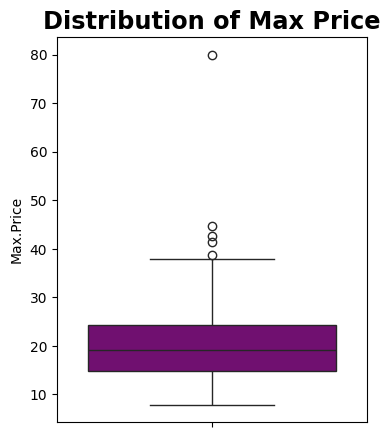

In [ ]:
plt.figure(figsize=(4, 5))
sns.boxplot(cars["Max.Price"], color="purple")
plt.title('Distribution of Max Price')
plt.show()

<ipython-input-14-112b40460213>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(cars["Max.Price"], kde=True, bins=45, element='step', palette='tab10')


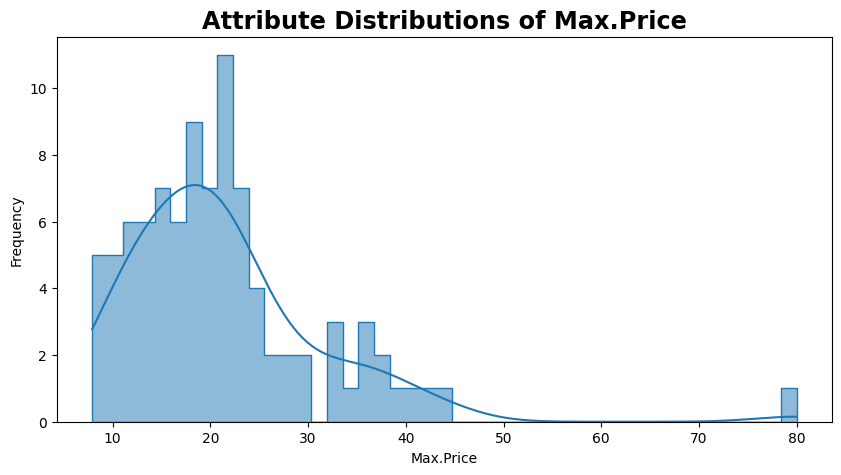

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(cars["Max.Price"], kde=True, bins=45, element='step', palette='tab10')
plt.title('Attribute Distributions of Max.Price')
plt.ylabel('Frequency')
plt.show()

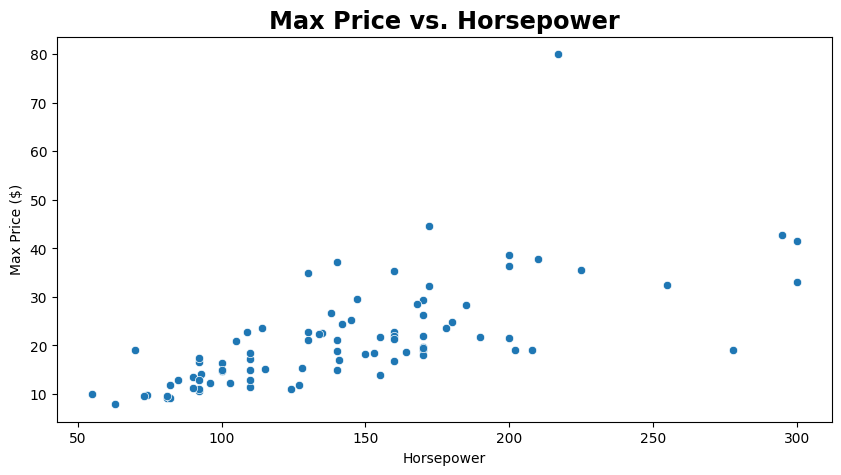

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Horsepower', y='Max.Price', data=cars)
plt.title('Max Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Max Price ($)')
plt.show()
